# **CS-473 (Pattern Recognition)**

## Assignment 4

##### Nikolaos Kougioulis (csdp1285)

---


### **Question 1** 

The scope of this exercise is to get you familiar with training a linear classifier with Gradient Descent.

**Data:** For this exercise, you will use the dataset in the dataset.csv file that consists of 1000 2-dimensional data samples and their labels.

**Equation:**
$$\text{learning_rate}_i = \frac{1}{\sqrt{k_i}}$$

where $k_i = k_{i-1} + (i \mod n), ~k_0 = 0, i \geq 1, i = \text{iteration index}, n = \text{number of samples.}$

In [ ]:
!python --version

Python 3.10.11


In [ ]:
import math 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
import random 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
df = pd.read_csv("dataset.csv", sep=",")
df = df.iloc[: , 1:] #remove id collumn
print(df.head())

   feature_0  feature_1  labels
0   2.185032   2.022557       0
1   0.866080   3.897338       0
2   2.545462   1.349999       1
3   0.846336   2.862082       0
4   2.603855   4.222687       0


**Questions:**

1. Create a scatter plot of the dataset. Is the dataset linearly separable? Justify your answer in 1-2 sentences.

**Solution**

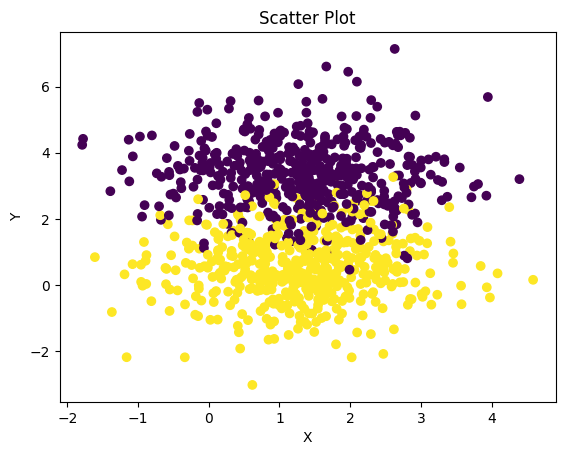

In [ ]:
labels = df["labels"]

plt.scatter(df["feature_0"], df["feature_1"], c=labels)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

The provided data are not linearly separable, as there is no distinct hyperplane (in this case since we are dealing with two dimensional features, a line) that clearly separates the two classes. Notice that in the middle of the plot, some points coincide with the cluster of the points in the opposite class, thus making it clear that a linear classifier, eg a perceptron, would not perform adequately. 

In more detail, given a set of observations $\left\{ (\mathbf{x}_i, y_i \right\}_{i=1,2,\ldots,n}$ where $\mathbf{x}$ is a vector of features and $y_i \in \left\{-1,1\right\}$ the corresponding binary class of the feature vector $\mathbf{x}_i$, the set is said to be *linearly separable* if there exists a vector of weights $\mathbf{w}$ and a bias term $b$ such that the corresponding hyperplane perfectly separates the two classes, that is for an observed feature vector $\mathbf{x}$,

$$y = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b) = \begin{cases} \text{class 1}, ~\text{if} ~\mathbf{w} \cdot \mathbf{x} + b >0 \\ \text{class -1}, ~\text{if} ~\mathbf{w} \cdot \mathbf{x} + b < 0 \end{cases}$$

2. Create a function called *train single sample* that implements the Fixed-Increment Single-Sample Perceptron algorithm. The arguments of the function should be:

 (a) a := weights + bias (bias trick)

 (b) y := data + 1s (bias trick)

 (c) labels

 (d) n iterations := the number of iterations/updates

 (e) lr := learning rate

 (f) variable lr := boolean 
 
 and the function should return:

 (a) a := trained model

 (b) acc history := list of accuracy values

The algorithm should be implemented according to the notes. Extra functionalities include computing and printing the model's accuracy every *n_samples* iterations. Also, you should save and return only the best
model. **Bonus 2.5%:** Use the tqdm library to print the progress of the model along with the accuracy during training.

**Solution**

The pseudocode for the fixed-increment single-sample perceptron is the following [1]:

**Algorithm** fixed-increment single-sample perceptron:

---
**begin:** initialize $\mathbf{a}, ~k=0$
**do** $k = (k+1)\text{mod}n$ where $n$, is the number of samples

  **if** $\mathbf{y}_k$ is misclassified by $\mathbf{a}$ then update $\mathbf{a}$ by $\mathbf{a} \leftarrow a - \lambda \mathbf{y}_k$

  **until** all patterns are properly classified or after a fixed number of iterations

**end**

where $\lambda$ is the learning rate.

We utilize the *tqdm* library for monitoring the training progress using a tqdm iterator object and compute the accuracy every *n_samples* iterations and print using *tqdm.write*. The function *train_single_sample is illustrated bellow:

In [ ]:
def train_single_sample(a, y, labels, n_iterations, lr, variable_lr):
    acc_history = []
    best_accuracy = float("-inf")
    best_model = None
    
    labels = np.where(labels == 0, -1, labels) #change labels to -1,1 for practical reasons
    n_samples = len(labels)

    for iteration in tqdm(range(n_iterations), desc="Single-sample Perceptron Training"):
        correct_predictions = 0
        #print(iteration)
        k = iteration % n_samples
        x = y[k].astype(a.dtype)
        label = labels[k]
            
        if np.sign(np.dot(a, x)) != label:
            a = a - lr * x.astype(a.dtype)
      
        #compute accuracy every n_samples iterations
        if (iteration) % n_samples == 0: 
            accuracy = 0
            for j in range(n_samples):
                x = y[j].astype(a.dtype)
                label = labels[j]
                if np.sign(np.dot(a, x)) == label:
                    accuracy += 1
            accuracy /= n_samples
            acc_history.append(accuracy)
            tqdm.write(f"Accuracy: {accuracy:.2f}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = a 

    if best_model is None:
        best_accuracy = 0
        best_model = np.zeros_like(a)
    
    return best_model, acc_history

3. Create a function called *plot model* that takes as input the trained weights (+ bias), the data, and the labels and returns a scatter plot with the decision boundaries of the model (Hint: Use contourf)

**Solution**

After generating a meshgrid, we compute the predicted class for each point in the meshgrid and color the decision boundary using contourf. This is illustrated in the *plot_model* function below:

In [ ]:
def plot_model(a, y, labels):
    x_1 = np.linspace(-10, 10, 100)
    x_2 = np.linspace(-10, 10, 100)
    xx_1, xx_2 = np.meshgrid(x_1, x_2)
    Z = np.zeros((len(x_1), len(x_2)))
    for i in range(len(x_1)):
        for j in range(len(x_2)):
            Z[i, j] = np.dot(a, np.array([x_1[i], x_2[j], 1]))
    Z = np.sign(Z)

    plt.contourf(xx_1, xx_2, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(y[:, 0], y[:, 1], c=labels, cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

4. Train a linear model using the functions you have implemented. Use the following hyperparameters: (a) n iterations = 100000 (b) lr = 100000 (c) variable lr = False

**Solution**

We add 1s using the bias trick and call the function with the requested hyperparameters:

In [ ]:
y = df[['feature_0', 'feature_1']].to_numpy()
labels = df['labels'].to_numpy()

#print(y.shape)
#print(labels.shape)

#add 1s (bias trick)
#y = np.hstack((y, np.ones((y.shape[0], 1))))
bias_trick = np.ones((len(y), 1))
y = np.concatenate((y, bias_trick), axis=1)

In [ ]:
#initial weights and bias (including bias trick)

a = np.random.rand(1,3) #random 1x3 np array
a[:-1] = 1 #bias trick

n_iterations = 10**5
lr = 1
variable_lr = False 

best_model, acc_history = train_single_sample(a, y, labels, n_iterations, lr, variable_lr)

Single Sample Perceptron Training:  12%|█▏        | 12001/100000 [00:00<00:01, 56985.54it/s]

Accuracy: 0.47
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  18%|█▊        | 17704/100000 [00:00<00:01, 52576.53it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  33%|███▎      | 33472/100000 [00:00<00:01, 49952.33it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  44%|████▍     | 44001/100000 [00:00<00:01, 50983.04it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  54%|█████▍    | 54165/100000 [00:01<00:00, 48649.56it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  64%|██████▍   | 64001/100000 [00:01<00:00, 47077.02it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  74%|███████▍  | 74001/100000 [00:01<00:00, 47540.39it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  95%|█████████▌| 95001/100000 [00:01<00:00, 49582.47it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training: 100%|██████████| 100000/100000 [00:02<00:00, 49017.63it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


5. Plot the history of the accuracy during training.

**Solution**


Best Model: [[2.04808885 0.13603999 4.16612967]]
Accuracy History: [0.468, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


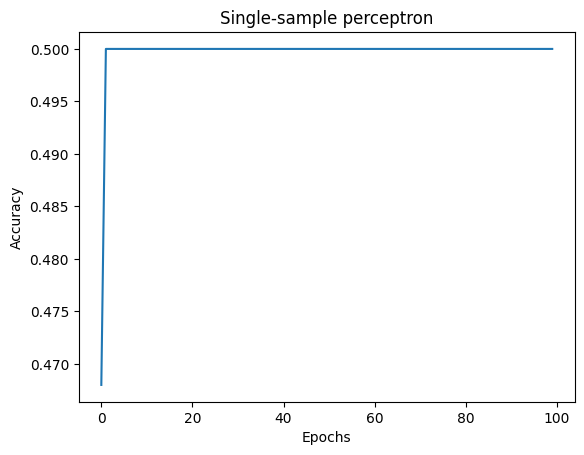

In [ ]:
print("Best Model:", best_model)
print("Accuracy History:", acc_history)
#print("Best accuracy:", max(acc_history))
plt.plot(acc_history)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Single-sample perceptron")
plt.show()

6. Plot the data along and the trained model. Use the *plot model* function you implemented before.

**Solution**

This question is answered by calling the *plot_model* function defined previously.

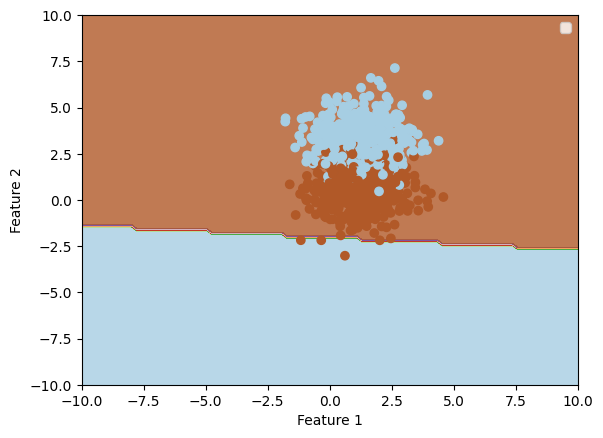

In [ ]:
plot_model(best_model,y,labels)

7. Now we are going to retrain our model but with a variable learning rate. Create a *Scheduler* class that implements a function *get next lr* that every time it is called returns the next learning rate. The object should work according to the function at the beginning of the assignment. Test your object by initializing it and plotting the learning rate over 100 steps. Now configure the training function to use this object when *variable lr = True*

**Solution**

Our implemented scheduler class is the following, where $\text{learning_rate}_i = \frac{1}{\sqrt{k_i}}$ with $k_i = k_{i-1} + (i \mod n), ~k_0 = 0, i \geq 1, i = \text{iteration index}, n = \text{number of samples.}$

In [ ]:
class Scheduler:
    def __init__(self, lr, n_samples):
        self.lr = lr
        self.n_samples = n_samples
        self.k = 0

    def get_next_lr(self):
        lr = 1 / np.sqrt(self.k + 1)
        self.k = self.k + (i % self.n_samples)
        return lr

We can confirm our scheduler works as expected by initializing the learning rate to $1$ and then plotting the decaying learning rate for 100 steps.

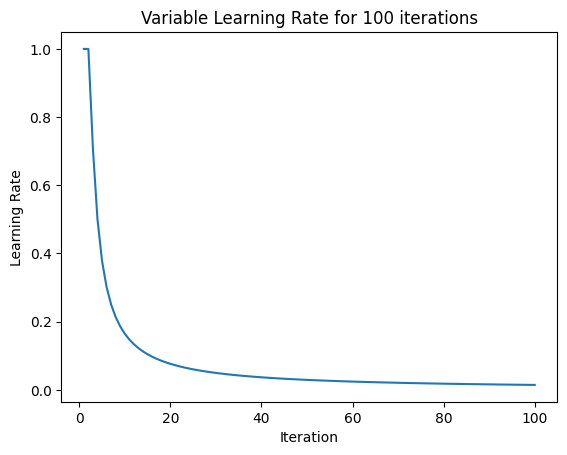

In [ ]:
scheduler = Scheduler(lr=1, n_samples=100)

rates = []
for i in range(100):
    learning_rate = scheduler.get_next_lr()
    rates.append(learning_rate)

plt.plot(range(1, 101), rates)
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Variable Learning Rate for 100 iterations')
plt.show()

8. Retrain the model with a variable learning rate. Plot the dataset and the trained model as before. What is the main difference compared to training with a fixed learning rate? What method do you think is better? Justify your answer.

**Solution**

We re-write the *train_single_sample* function in order to take into account the Scheduler class and when the *variable_lr* argument is equal to True.

The main difference betwen training with a fixed learning rate and a variable (also called decaying) learning rate is that instead of updating the weights by a constant factor at each iteration, which often leads to slower convergence of the optimization method and being trapped in a local extrema instead of convering to the global extrema. In many cases, learning with a variable learning rate allows for faster convergence of the approximation method (in our case, the update rule of the perceptron learning is gradient descent optimization) and allows to avoid being trapped in local extrema like the fixed learning rate. All in all, although learning is an optimization problem and not an explicitely defined one, as it heavily depends on the starting configurations at $t=0$ and the characteristics of the data, variable learning rate is often preffered due to its added flexibility.



---


[Versloot, C. (2019,November 11) Problems with fixed and decaying learning rates](https://github.com/christianversloot/machine-learning-articles/blob/main/problems-with-fixed-and-decaying-learning-rates.md)

[Lau, S. (2017, August 1). Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)



In [ ]:
def train_single_sample(a, y, labels, n_iterations, lr, variable_lr):
    acc_history = []
    best_accuracy = float("-inf")
    best_model = None
    
    labels = np.where(labels == 0, -1, labels)
    n_samples = len(labels)

    if variable_lr:
        scheduler = Scheduler(lr, n_samples)

    for iteration in tqdm(range(n_iterations), desc="Single Sample Perceptron Training"):
        correct_predictions = 0
        
        k = (iteration +1) % n_samples
        x = y[k].astype(a.dtype)
        label = labels[k]
            
        if np.sign(np.dot(a, x)) == -1:
          a += lr * x.astype(a.dtype)

          if variable_lr:
            lr = scheduler.get_next_lr()
      
        #compute the accuracy every n_samples iterations
        if iteration % n_samples == 0:
            accuracy = 0
            for j in range(n_samples):
                x = y[j].astype(a.dtype)
                label = labels[j]
                if np.sign(np.dot(a, x)) == label:
                    accuracy += 1
            accuracy /= n_samples
            acc_history.append(accuracy)
            tqdm.write(f"Accuracy: {accuracy:.2f}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = a 

        if best_model is None:
         best_accuracy = 0
         best_model = np.zeros_like(a)
    
    return best_model, acc_history

Single Sample Perceptron Training:  11%|█▏        | 11424/100000 [00:00<00:01, 55859.43it/s]

Accuracy: 0.47
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  28%|██▊       | 28001/100000 [00:00<00:01, 51026.29it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  39%|███▉      | 39001/100000 [00:00<00:01, 50800.66it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  50%|█████     | 50410/100000 [00:01<00:00, 51686.75it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  61%|██████    | 60932/100000 [00:01<00:00, 49744.93it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training:  77%|███████▋  | 76579/100000 [00:01<00:00, 51278.75it/s]

Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50
Accuracy: 0.50


Single Sample Perceptron Training: 100%|██████████| 100000/100000 [00:01<00:00, 51231.41it/s]


Accuracy: 0.50
Best Model: [[1.9826818  0.23427457 2.99758966]]


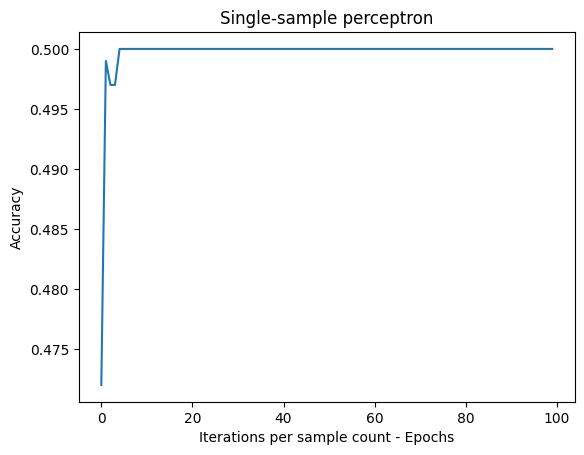

In [ ]:
a = np.random.rand(1,3)
a[:-1] = 1 #bias trick

n_iterations = 10**5 
lr = 1
variable_lr = True

best_model, acc_history = train_single_sample(a, y, labels, n_iterations, lr, variable_lr)

print("Best Model:", best_model)

plt.plot(acc_history)
plt.xlabel("Iterations per sample count - Epochs")
plt.ylabel("Accuracy")
plt.title("Single-sample perceptron")

plt.show()

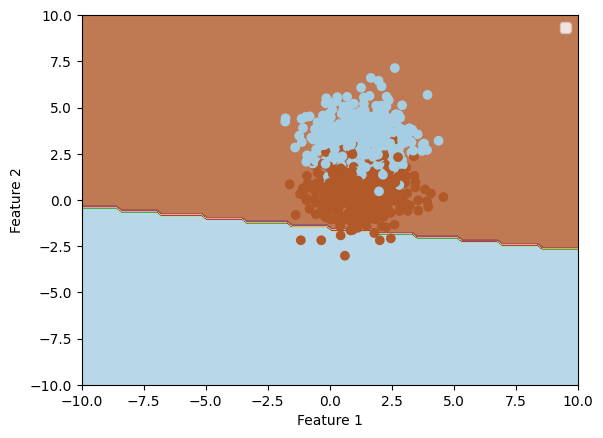

In [ ]:
plot_model(best_model,y,labels)

### **Question 2** 

The data, the equation, and the notice from the previous question apply to this one too.

**Questions:**

1. Create a function called *train batch* that implements the Batch Perceptron algorithm. The arguments of the function should be:

 (a) the same as the *train single sample* in Question 1 +
 (b) theta := the value for the theta criterion
 (c) batch size and the function should return:
 (a) the same as the *train single sample* in Question 1 +
 (b) error history := list of error values

 The algorithm should be implemented according to the notes. Extra functionalities include computing and n samples printing the model's accuracy and the error every batch size iterations. Also, you should save and return only the best model. The error here is the absolute sum of the updating step, that is the value we use to update the weights. **Bonus 2.5%:** Use the tqdm library to print the progress of the model along with the accuracy and the error during training.



**Solution**

This question is similar to the previous ones, except we check for misclassified samples and update the gradient using batches of features instead of a single feature. Batching is performed using sampling without replacement, and the update step is performed by summing over the misclassified samples. In more detail [1]:

**Algorithm** fixed-variable-increment batch perceptron:

---
**begin:** initialize $\mathbf{a}, ~\eta(k), ~k=0, ~\text{threshold} ~\theta$

**do** $k = (k+1)$

 $$\displaystyle \mathbf{a} \leftarrow a + \eta(k) \sum_{y \in \mathcal{Y}_k}  \mathbf{y}$$

  $$\textbf{until} ~~\displaystyle \eta(k) \sum_{y \in \mathcal{Y}_k}  \mathbf{y} < \theta$$

**end**

where $\eta(k)$ is the fixed-variable learning rate dependent on iteration k.

This is implemented in the *train_batch* function, with the two additional parameters *batch_size* (size of the randomly sampled batch, without replacement) and *theta* (theta termination criterion):

In [ ]:
def train_batch(a, y, labels, n_iterations, lr, variable_lr, batch_size, theta):
    acc_history = []
    error_history = []
    best_accuracy = float("-inf")
    best_model = None
    
    labels = np.where(labels == 0, -1, labels)
    n_samples = len(labels)
    
    for iteration in tqdm(range(n_iterations), desc="Batch perceptron training"):
        error = np.zeros_like(a)
        
        indices = np.random.choice(n_samples, size=batch_size, replace=False)
        batch_y = y[indices]
        batch_labels = labels[indices]
        
        for k in range(batch_size):
            x = batch_y[k].astype(a.dtype)
            label = batch_labels[k]
            
            if np.sign(np.dot(a, x)) != label:
                error += x.astype(a.dtype)
        
        a += lr * error
        
        #compute accuracy and abs error every n_samples / batch_size iterations
        if (iteration % (n_samples / batch_size)) == 0:
          accuracy = np.mean([np.sign(np.dot(a, x)) == label for x, label in zip(y, labels)])
          acc_history.append(accuracy)
          tqdm.write(f"Accuracy: {accuracy:.2f}")
          error_history.append(np.abs(np.sum(error)))
          tqdm.write(f"Absolute Error: {np.sum(np.abs(error)):.2f}")

          if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = np.copy(a)
        
        if np.sum(np.abs(error)) <= theta:
            tqdm.write("Terminating due to the theta criterion")
            break

        if best_model is None:
         best_accuracy = 0
         best_model = np.zeros_like(a)
    
    return best_model, acc_history, error_history

2. Train a linear model using the function *train batch* you have implemented. Use the following hyperparameters:

 (a) n_iterations = 100000

 (b) theta = 0.01

 (c) batch_size = 16

 (d) lr = 100000

 (e) variable_lr = False

**Solution**

In [ ]:
a = np.random.rand(1,3) #including bias trick
a[:-1] = 1

n_iterations = 10**5
lr = 1
theta = 0.01
batch_size = 16
variable_lr = False

best_model, acc_history, error_history = train_batch(a, y, labels, n_iterations, lr, variable_lr, batch_size, theta)

print(best_model)

Batch perceptron training:   0%|          | 262/100000 [00:00<00:38, 2619.03it/s]

Accuracy: 0.45
Absolute Error: 43.32
Accuracy: 0.45
Absolute Error: 54.23
Accuracy: 0.46
Absolute Error: 44.58
Accuracy: 0.46
Absolute Error: 39.02
Accuracy: 0.46
Absolute Error: 24.60
Accuracy: 0.45
Absolute Error: 52.79


Batch perceptron training:   1%|▏         | 1251/100000 [00:00<00:34, 2881.57it/s]

Accuracy: 0.46
Absolute Error: 40.07
Accuracy: 0.46
Absolute Error: 49.91
Accuracy: 0.45
Absolute Error: 49.98
Accuracy: 0.45
Absolute Error: 31.96
Accuracy: 0.45
Absolute Error: 44.91


Batch perceptron training:   2%|▏         | 1826/100000 [00:00<00:37, 2588.15it/s]

Accuracy: 0.45
Absolute Error: 36.13
Accuracy: 0.45
Absolute Error: 43.06
Accuracy: 0.45
Absolute Error: 24.66
Accuracy: 0.45
Absolute Error: 49.50


Batch perceptron training:   2%|▏         | 2089/100000 [00:00<00:41, 2344.52it/s]

Accuracy: 0.45
Absolute Error: 56.99
Accuracy: 0.45
Absolute Error: 56.24
Accuracy: 0.45
Absolute Error: 25.38


Batch perceptron training:   2%|▏         | 2329/100000 [00:01<00:51, 1901.97it/s]

Accuracy: 0.45
Absolute Error: 60.66
Accuracy: 0.45
Absolute Error: 55.32
Accuracy: 0.45
Absolute Error: 49.96


Accuracy: 0.45
Absolute Error: 49.21
Accuracy: 0.45
Absolute Error: 61.51
Accuracy: 0.45
Absolute Error: 69.03


Batch perceptron training:   3%|▎         | 3361/100000 [00:01<00:53, 1809.59it/s]

Accuracy: 0.45
Absolute Error: 42.73
Accuracy: 0.45
Absolute Error: 36.02
Accuracy: 0.45
Absolute Error: 49.36


Batch perceptron training:   4%|▎         | 3546/100000 [00:01<01:00, 1587.81it/s]

Accuracy: 0.45
Absolute Error: 46.51
Accuracy: 0.45
Absolute Error: 31.69
Accuracy: 0.45
Absolute Error: 48.50


Accuracy: 0.45
Absolute Error: 44.16
Accuracy: 0.45
Absolute Error: 37.45
Accuracy: 0.45


Batch perceptron training:   4%|▍         | 4165/100000 [00:02<01:15, 1268.59it/s]

Absolute Error: 48.38
Accuracy: 0.45
Absolute Error: 72.13
Accuracy: 0.45


Absolute Error: 55.32
Accuracy: 0.45
Absolute Error: 46.13
Accuracy: 0.45
Absolute Error: 64.76
Accuracy: 0.45
Absolute Error: 52.79
Accuracy: 0.45
Absolute Error: 75.07


Batch perceptron training:   5%|▌         | 5263/100000 [00:02<00:40, 2321.46it/s]

Accuracy: 0.45
Absolute Error: 52.16
Accuracy: 0.45
Absolute Error: 45.37
Accuracy: 0.45
Absolute Error: 26.85
Accuracy: 0.45
Absolute Error: 39.10
Accuracy: 0.45
Absolute Error: 37.42


Batch perceptron training:   6%|▌         | 5849/100000 [00:02<00:35, 2630.40it/s]

Accuracy: 0.45
Absolute Error: 53.21
Accuracy: 0.45
Absolute Error: 43.52
Accuracy: 0.45
Absolute Error: 74.18
Accuracy: 0.45
Absolute Error: 48.51
Accuracy: 0.45
Absolute Error: 54.49


Batch perceptron training:   6%|▋         | 6477/100000 [00:03<00:32, 2843.65it/s]

Accuracy: 0.45
Absolute Error: 65.21
Accuracy: 0.45
Absolute Error: 45.66
Accuracy: 0.45
Absolute Error: 29.75
Accuracy: 0.45
Absolute Error: 42.72
Accuracy: 0.45
Absolute Error: 45.65


Batch perceptron training:   7%|▋         | 7126/100000 [00:03<00:31, 2944.42it/s]

Accuracy: 0.45
Absolute Error: 64.96
Accuracy: 0.45
Absolute Error: 25.70
Accuracy: 0.45
Absolute Error: 45.31
Accuracy: 0.45
Absolute Error: 39.82
Accuracy: 0.45
Absolute Error: 50.04
Accuracy: 0.45


Batch perceptron training:   8%|▊         | 7751/100000 [00:03<00:31, 2917.42it/s]

Absolute Error: 63.22
Accuracy: 0.45
Absolute Error: 32.77
Accuracy: 0.45
Absolute Error: 55.57
Accuracy: 0.45
Absolute Error: 60.38
Accuracy: 0.45
Absolute Error: 29.90


Batch perceptron training:   8%|▊         | 8353/100000 [00:03<00:31, 2926.58it/s]

Accuracy: 0.45
Absolute Error: 22.27
Accuracy: 0.45
Absolute Error: 65.46
Accuracy: 0.45
Absolute Error: 57.22
Accuracy: 0.45
Absolute Error: 50.74
Accuracy: 0.45
Absolute Error: 42.55


Batch perceptron training:   9%|▉         | 8933/100000 [00:04<00:33, 2756.92it/s]

Accuracy: 0.45
Absolute Error: 55.57
Accuracy: 0.45
Absolute Error: 28.40
Accuracy: 0.45
Absolute Error: 42.50
Accuracy: 0.45
Absolute Error: 37.27
Accuracy: 0.45
Absolute Error: 40.24


Batch perceptron training:  10%|▉         | 9528/100000 [00:04<00:32, 2746.91it/s]

Accuracy: 0.45
Absolute Error: 61.15
Accuracy: 0.45
Absolute Error: 47.46
Accuracy: 0.45
Absolute Error: 36.41
Accuracy: 0.45
Absolute Error: 44.54
Accuracy: 0.45
Absolute Error: 43.16


Batch perceptron training:  10%|█         | 10154/100000 [00:04<00:32, 2763.72it/s]

Accuracy: 0.45
Absolute Error: 41.73
Accuracy: 0.45
Absolute Error: 41.41
Accuracy: 0.45
Absolute Error: 46.26
Accuracy: 0.45
Absolute Error: 20.72
Accuracy: 0.45
Absolute Error: 59.00


Batch perceptron training:  11%|█         | 10876/100000 [00:04<00:29, 2998.20it/s]

Accuracy: 0.45
Absolute Error: 44.78
Accuracy: 0.45
Absolute Error: 45.10
Accuracy: 0.45
Absolute Error: 41.01
Accuracy: 0.45
Absolute Error: 78.54
Accuracy: 0.45
Absolute Error: 63.99
Accuracy: 0.45
Absolute Error: 42.25


Batch perceptron training:  12%|█▏        | 11866/100000 [00:04<00:27, 3205.99it/s]

Accuracy: 0.45
Absolute Error: 49.81
Accuracy: 0.45
Absolute Error: 59.36
Accuracy: 0.45
Absolute Error: 57.29
Accuracy: 0.45
Absolute Error: 55.55
Accuracy: 0.45
Absolute Error: 55.08
Accuracy: 0.45


Batch perceptron training:  12%|█▏        | 12188/100000 [00:05<00:29, 2998.54it/s]

Absolute Error: 43.35
Accuracy: 0.45
Absolute Error: 28.06
Accuracy: 0.45
Absolute Error: 34.35
Accuracy: 0.45
Absolute Error: 57.53
Accuracy: 0.45
Absolute Error: 31.68


Batch perceptron training:  13%|█▎        | 12815/100000 [00:05<00:29, 2961.42it/s]

Accuracy: 0.45
Absolute Error: 35.80
Accuracy: 0.45
Absolute Error: 34.86
Accuracy: 0.45
Absolute Error: 45.51
Accuracy: 0.45
Absolute Error: 48.78
Accuracy: 0.45
Absolute Error: 41.73


Batch perceptron training:  13%|█▎        | 13405/100000 [00:05<00:30, 2826.74it/s]

Accuracy: 0.45
Absolute Error: 58.11
Accuracy: 0.45
Absolute Error: 47.93
Accuracy: 0.45
Absolute Error: 52.53
Accuracy: 0.45
Absolute Error: 49.19
Accuracy: 0.45
Absolute Error: 36.73
Accuracy: 0.45
Absolute Error: 55.98


Accuracy: 0.45
Absolute Error: 44.05
Accuracy: 0.45
Absolute Error: 30.23
Accuracy: 0.45
Absolute Error: 57.62
Accuracy: 0.45
Absolute Error: 60.86
Accuracy: 0.45
Absolute Error: 33.47
Accuracy: 0.45
Absolute Error: 41.72


Batch perceptron training:  15%|█▌        | 15042/100000 [00:06<00:29, 2855.79it/s]

Accuracy: 0.45
Absolute Error: 53.61
Accuracy: 0.45
Absolute Error: 48.00
Accuracy: 0.45
Absolute Error: 51.23
Accuracy: 0.45
Absolute Error: 24.88


Batch perceptron training:  16%|█▌        | 15694/100000 [00:06<00:28, 2967.14it/s]

Accuracy: 0.45
Absolute Error: 44.04
Accuracy: 0.45
Absolute Error: 57.85
Accuracy: 0.45
Absolute Error: 40.76
Accuracy: 0.45
Absolute Error: 61.33
Accuracy: 0.45
Absolute Error: 59.49


Accuracy: 0.45
Absolute Error: 24.92
Accuracy: 0.45
Absolute Error: 58.87
Accuracy: 0.45
Absolute Error: 33.75
Accuracy: 0.45
Absolute Error: 58.26
Accuracy: 0.45
Absolute Error: 47.04


Batch perceptron training:  17%|█▋        | 16674/100000 [00:06<00:28, 2922.46it/s]

Accuracy: 0.45
Absolute Error: 36.80
Accuracy: 0.45
Absolute Error: 52.24
Accuracy: 0.45
Absolute Error: 42.86
Accuracy: 0.45
Absolute Error: 65.83
Accuracy: 0.45
Absolute Error: 50.83


Batch perceptron training:  17%|█▋        | 17363/100000 [00:06<00:26, 3103.49it/s]

Accuracy: 0.45
Absolute Error: 48.14
Accuracy: 0.45
Absolute Error: 52.16
Accuracy: 0.45
Absolute Error: 42.68
Accuracy: 0.45
Absolute Error: 47.09
Accuracy: 0.45
Absolute Error: 30.18


Batch perceptron training:  18%|█▊        | 17992/100000 [00:07<00:27, 3019.66it/s]

Accuracy: 0.45
Absolute Error: 46.70
Accuracy: 0.45
Absolute Error: 50.52
Accuracy: 0.45
Absolute Error: 41.73
Accuracy: 0.45
Absolute Error: 54.83
Accuracy: 0.45
Absolute Error: 48.34


Accuracy: 0.45
Absolute Error: 44.01
Accuracy: 0.45
Absolute Error: 52.18
Accuracy: 0.45
Absolute Error: 33.15
Accuracy: 0.45
Absolute Error: 49.25
Accuracy: 0.45
Absolute Error: 62.66
Accuracy: 0.45


Batch perceptron training:  20%|█▉        | 19590/100000 [00:07<00:26, 3063.83it/s]

Absolute Error: 36.86
Accuracy: 0.45
Absolute Error: 31.68
Accuracy: 0.45
Absolute Error: 13.61
Accuracy: 0.45
Absolute Error: 58.46
Accuracy: 0.45
Absolute Error: 45.44
Accuracy: 0.45
Absolute Error: 46.93


Batch perceptron training:  20%|██        | 20251/100000 [00:07<00:26, 3057.52it/s]

Accuracy: 0.45
Absolute Error: 39.20
Accuracy: 0.45
Absolute Error: 44.64
Accuracy: 0.45
Absolute Error: 33.26
Accuracy: 0.45
Absolute Error: 61.62
Accuracy: 0.45
Absolute Error: 29.32
Accuracy: 0.45
Absolute Error: 36.63


Batch perceptron training:  21%|██        | 20894/100000 [00:07<00:26, 3020.83it/s]

Accuracy: 0.45
Absolute Error: 67.76
Accuracy: 0.45
Absolute Error: 25.18
Accuracy: 0.45
Absolute Error: 52.06
Accuracy: 0.45
Absolute Error: 67.14
Accuracy: 0.45
Absolute Error: 29.54


Batch perceptron training:  22%|██▏       | 21501/100000 [00:08<00:26, 2970.64it/s]

Accuracy: 0.45
Absolute Error: 57.24
Accuracy: 0.45
Absolute Error: 44.27
Accuracy: 0.45
Absolute Error: 23.79
Accuracy: 0.45
Absolute Error: 42.32
Accuracy: 0.45
Absolute Error: 39.20


Batch perceptron training:  22%|██▏       | 22154/100000 [00:08<00:27, 2881.21it/s]

Accuracy: 0.45
Absolute Error: 26.78
Accuracy: 0.45
Absolute Error: 43.46
Accuracy: 0.45
Absolute Error: 39.22
Accuracy: 0.45
Absolute Error: 69.04
Accuracy: 0.45
Absolute Error: 24.62


Batch perceptron training:  23%|██▎       | 22751/100000 [00:08<00:27, 2829.90it/s]

Accuracy: 0.45
Absolute Error: 30.98
Accuracy: 0.45
Absolute Error: 61.61
Accuracy: 0.45
Absolute Error: 66.79
Accuracy: 0.45
Absolute Error: 38.17
Accuracy: 0.45
Absolute Error: 39.03


Batch perceptron training:  23%|██▎       | 23107/100000 [00:08<00:25, 3035.59it/s]

Accuracy: 0.45
Absolute Error: 43.31
Accuracy: 0.45
Absolute Error: 60.73
Accuracy: 0.45
Absolute Error: 28.92
Accuracy: 0.45
Absolute Error: 70.66
Accuracy: 0.45
Absolute Error: 43.77


Batch perceptron training:  24%|██▍       | 24002/100000 [00:09<00:27, 2814.69it/s]

Accuracy: 0.45
Absolute Error: 41.90
Accuracy: 0.45
Absolute Error: 38.98
Accuracy: 0.45
Absolute Error: 65.79
Accuracy: 0.45
Absolute Error: 9.83
Accuracy: 0.45
Absolute Error: 36.69


Batch perceptron training:  25%|██▍       | 24626/100000 [00:09<00:26, 2808.04it/s]

Accuracy: 0.45
Absolute Error: 26.62
Accuracy: 0.45
Absolute Error: 23.09
Accuracy: 0.45
Absolute Error: 52.89
Accuracy: 0.45
Absolute Error: 44.23
Accuracy: 0.45
Absolute Error: 31.64


Batch perceptron training:  25%|██▌       | 25200/100000 [00:09<00:27, 2708.91it/s]

Accuracy: 0.45
Absolute Error: 50.31
Accuracy: 0.45
Absolute Error: 54.48
Accuracy: 0.45
Absolute Error: 37.03
Accuracy: 0.45
Absolute Error: 46.92
Accuracy: 0.45


Batch perceptron training:  26%|██▌       | 25801/100000 [00:09<00:26, 2822.16it/s]

Absolute Error: 52.38
Accuracy: 0.45
Absolute Error: 54.02
Accuracy: 0.45
Absolute Error: 53.82
Accuracy: 0.45
Absolute Error: 38.34
Accuracy: 0.45
Absolute Error: 49.07


Batch perceptron training:  26%|██▋       | 26376/100000 [00:09<00:26, 2750.37it/s]

Accuracy: 0.45
Absolute Error: 43.50
Accuracy: 0.45
Absolute Error: 57.28
Accuracy: 0.45
Absolute Error: 68.59
Accuracy: 0.45
Absolute Error: 76.55
Accuracy: 0.45
Absolute Error: 31.39


Batch perceptron training:  27%|██▋       | 26937/100000 [00:10<00:28, 2524.82it/s]

Accuracy: 0.45
Absolute Error: 42.51
Accuracy: 0.45
Absolute Error: 39.43
Accuracy: 0.45
Absolute Error: 56.75
Accuracy: 0.45
Absolute Error: 42.69


Batch perceptron training:  27%|██▋       | 27444/100000 [00:10<00:29, 2438.95it/s]

Accuracy: 0.45
Absolute Error: 44.72
Accuracy: 0.45
Absolute Error: 46.20
Accuracy: 0.45
Absolute Error: 40.87
Accuracy: 0.45
Absolute Error: 37.64


Batch perceptron training:  28%|██▊       | 27931/100000 [00:10<00:30, 2376.86it/s]

Accuracy: 0.45
Absolute Error: 51.23
Accuracy: 0.45
Absolute Error: 51.48
Accuracy: 0.45
Absolute Error: 64.94
Accuracy: 0.45
Absolute Error: 60.68


Batch perceptron training:  28%|██▊       | 28457/100000 [00:10<00:28, 2500.01it/s]

Accuracy: 0.45
Absolute Error: 47.81
Accuracy: 0.45
Absolute Error: 39.57
Accuracy: 0.45
Absolute Error: 45.20
Accuracy: 0.45
Absolute Error: 29.33
Accuracy: 0.45
Absolute Error: 19.91


Batch perceptron training:  29%|██▉       | 28961/100000 [00:11<00:30, 2364.09it/s]

Accuracy: 0.45
Absolute Error: 52.04
Accuracy: 0.45
Absolute Error: 42.23
Accuracy: 0.45
Absolute Error: 68.27
Accuracy: 0.45
Absolute Error: 42.59


Accuracy: 0.45
Absolute Error: 36.09
Accuracy: 0.45
Absolute Error: 46.50
Accuracy: 0.45
Absolute Error: 56.63
Accuracy: 0.45
Absolute Error: 18.59


Accuracy: 0.45
Absolute Error: 40.70
Accuracy: 0.45
Absolute Error: 50.12
Accuracy: 0.45
Absolute Error: 48.06
Accuracy: 0.45
Absolute Error: 30.36
Accuracy: 0.45


Batch perceptron training:  30%|███       | 30456/100000 [00:11<00:28, 2469.84it/s]

Absolute Error: 19.07
Accuracy: 0.45
Absolute Error: 39.24
Accuracy: 0.45
Absolute Error: 39.07
Accuracy: 0.45
Absolute Error: 54.00
Accuracy: 0.45


Batch perceptron training:  31%|███       | 30972/100000 [00:11<00:27, 2528.03it/s]

Absolute Error: 24.12
Accuracy: 0.45
Absolute Error: 52.23
Accuracy: 0.45
Absolute Error: 22.68
Accuracy: 0.45
Absolute Error: 45.26
Accuracy: 0.45
Absolute Error: 53.31


Batch perceptron training:  32%|███▏      | 31766/100000 [00:12<00:26, 2533.40it/s]

Accuracy: 0.45
Absolute Error: 58.65
Accuracy: 0.45
Absolute Error: 38.94
Accuracy: 0.45
Absolute Error: 34.98
Accuracy: 0.45
Absolute Error: 34.18
Accuracy: 0.45
Absolute Error: 27.18


Batch perceptron training:  32%|███▏      | 32270/100000 [00:12<00:27, 2435.58it/s]

Accuracy: 0.45
Absolute Error: 43.07
Accuracy: 0.45
Absolute Error: 58.45
Accuracy: 0.45
Absolute Error: 47.93
Accuracy: 0.45
Absolute Error: 41.72


Batch perceptron training:  33%|███▎      | 32776/100000 [00:12<00:27, 2449.42it/s]

Accuracy: 0.45
Absolute Error: 43.85
Accuracy: 0.45
Absolute Error: 56.40
Accuracy: 0.45
Absolute Error: 29.57
Accuracy: 0.45
Absolute Error: 59.04


Batch perceptron training:  33%|███▎      | 33260/100000 [00:12<00:29, 2262.07it/s]

Accuracy: 0.45
Absolute Error: 48.81
Accuracy: 0.45
Absolute Error: 40.66
Accuracy: 0.45
Absolute Error: 46.03
Accuracy: 0.45
Absolute Error: 39.04


Batch perceptron training:  34%|███▍      | 33751/100000 [00:12<00:29, 2214.59it/s]

Accuracy: 0.45
Absolute Error: 63.71
Accuracy: 0.45
Absolute Error: 31.57
Accuracy: 0.45
Absolute Error: 50.74
Accuracy: 0.45
Absolute Error: 62.92


Batch perceptron training:  34%|███▍      | 34251/100000 [00:13<00:28, 2294.28it/s]

Accuracy: 0.45
Absolute Error: 43.83
Accuracy: 0.45
Absolute Error: 34.63
Accuracy: 0.45
Absolute Error: 53.50
Accuracy: 0.45
Absolute Error: 39.98


Batch perceptron training:  35%|███▍      | 34849/100000 [00:13<00:24, 2636.21it/s]

Accuracy: 0.45
Absolute Error: 30.93
Accuracy: 0.45
Absolute Error: 14.65
Accuracy: 0.45
Absolute Error: 51.27
Accuracy: 0.45
Absolute Error: 61.52
Accuracy: 0.45
Absolute Error: 22.03


Batch perceptron training:  35%|███▌      | 35376/100000 [00:13<00:25, 2528.64it/s]

Accuracy: 0.45
Absolute Error: 43.34
Accuracy: 0.45
Absolute Error: 62.86
Accuracy: 0.45
Absolute Error: 44.70
Accuracy: 0.45
Absolute Error: 40.82
Accuracy: 0.45
Absolute Error: 59.90


Batch perceptron training:  36%|███▌      | 35976/100000 [00:13<00:23, 2692.70it/s]

Accuracy: 0.45
Absolute Error: 43.84
Accuracy: 0.45
Absolute Error: 65.91
Accuracy: 0.45
Absolute Error: 55.68
Accuracy: 0.45
Absolute Error: 46.83
Accuracy: 0.45
Absolute Error: 50.11


Batch perceptron training:  37%|███▋      | 36520/100000 [00:14<00:24, 2609.06it/s]

Accuracy: 0.45
Absolute Error: 36.22
Accuracy: 0.45
Absolute Error: 57.69
Accuracy: 0.45
Absolute Error: 40.40
Accuracy: 0.45
Absolute Error: 35.11
Accuracy: 0.45
Absolute Error: 48.37


Batch perceptron training:  37%|███▋      | 37390/100000 [00:14<00:22, 2733.05it/s]

Accuracy: 0.45
Absolute Error: 43.52
Accuracy: 0.45
Absolute Error: 29.87
Accuracy: 0.45
Absolute Error: 42.20
Accuracy: 0.45
Absolute Error: 18.55
Accuracy: 0.45
Absolute Error: 48.07


Batch perceptron training:  38%|███▊      | 37978/100000 [00:14<00:22, 2785.98it/s]

Accuracy: 0.45
Absolute Error: 56.90
Accuracy: 0.45
Absolute Error: 36.75
Accuracy: 0.45
Absolute Error: 34.49
Accuracy: 0.45
Absolute Error: 72.02
Accuracy: 0.45
Absolute Error: 61.78


Batch perceptron training:  39%|███▊      | 38618/100000 [00:14<00:21, 2893.53it/s]

Accuracy: 0.45
Absolute Error: 31.43
Accuracy: 0.45
Absolute Error: 35.27
Accuracy: 0.45
Absolute Error: 41.96
Accuracy: 0.45
Absolute Error: 28.82
Accuracy: 0.45
Absolute Error: 36.31


Batch perceptron training:  39%|███▉      | 39251/100000 [00:15<00:21, 2812.16it/s]

Accuracy: 0.45
Absolute Error: 63.36
Accuracy: 0.45
Absolute Error: 36.17
Accuracy: 0.45
Absolute Error: 37.03
Accuracy: 0.45
Absolute Error: 39.72
Accuracy: 0.45
Absolute Error: 31.09


Batch perceptron training:  40%|███▉      | 39876/100000 [00:15<00:21, 2853.96it/s]

Accuracy: 0.45
Absolute Error: 34.30
Accuracy: 0.45
Absolute Error: 46.54
Accuracy: 0.45
Absolute Error: 38.33
Accuracy: 0.45
Absolute Error: 61.16
Accuracy: 0.45
Absolute Error: 57.11


Batch perceptron training:  40%|████      | 40450/100000 [00:15<00:20, 2839.79it/s]

Accuracy: 0.45
Absolute Error: 61.89
Accuracy: 0.45
Absolute Error: 53.49
Accuracy: 0.45
Absolute Error: 38.69
Accuracy: 0.45
Absolute Error: 50.47
Accuracy: 0.45
Absolute Error: 35.82


Batch perceptron training:  41%|████      | 41030/100000 [00:15<00:21, 2773.18it/s]

Accuracy: 0.45
Absolute Error: 23.89
Accuracy: 0.45
Absolute Error: 50.75
Accuracy: 0.45
Absolute Error: 31.44
Accuracy: 0.45
Absolute Error: 26.07
Accuracy: 0.45
Absolute Error: 39.57


Batch perceptron training:  42%|████▏     | 41640/100000 [00:15<00:21, 2675.76it/s]

Accuracy: 0.45
Absolute Error: 53.57
Accuracy: 0.45
Absolute Error: 58.09
Accuracy: 0.45
Absolute Error: 32.44
Accuracy: 0.45
Absolute Error: 51.46
Accuracy: 0.45
Absolute Error: 45.03


Batch perceptron training:  42%|████▏     | 42238/100000 [00:16<00:20, 2841.70it/s]

Accuracy: 0.45
Absolute Error: 59.31
Accuracy: 0.45
Absolute Error: 44.96
Accuracy: 0.45
Absolute Error: 47.55
Accuracy: 0.45
Absolute Error: 58.23
Accuracy: 0.45
Absolute Error: 18.12


Batch perceptron training:  43%|████▎     | 42803/100000 [00:16<00:20, 2736.31it/s]

Accuracy: 0.45
Absolute Error: 62.24
Accuracy: 0.45
Absolute Error: 48.75
Accuracy: 0.45
Absolute Error: 28.41
Accuracy: 0.45
Absolute Error: 37.39
Accuracy: 0.45
Absolute Error: 47.23


Batch perceptron training:  44%|████▎     | 43730/100000 [00:16<00:19, 2940.76it/s]

Accuracy: 0.45
Absolute Error: 48.69
Accuracy: 0.45
Absolute Error: 47.37
Accuracy: 0.45
Absolute Error: 48.84
Accuracy: 0.45
Absolute Error: 35.57
Accuracy: 0.45
Absolute Error: 44.72


Batch perceptron training:  44%|████▍     | 44026/100000 [00:16<00:20, 2746.98it/s]

Accuracy: 0.45
Absolute Error: 25.58
Accuracy: 0.45
Absolute Error: 49.41
Accuracy: 0.45
Absolute Error: 47.31
Accuracy: 0.45
Absolute Error: 60.02
Accuracy: 0.45
Absolute Error: 47.67


Batch perceptron training:  45%|████▍     | 44876/100000 [00:17<00:20, 2673.86it/s]

Accuracy: 0.45
Absolute Error: 38.83
Accuracy: 0.45
Absolute Error: 51.48
Accuracy: 0.45
Absolute Error: 54.57
Accuracy: 0.45
Absolute Error: 52.61
Accuracy: 0.45
Absolute Error: 44.17


Batch perceptron training:  45%|████▌     | 45414/100000 [00:17<00:20, 2671.66it/s]

Accuracy: 0.45
Absolute Error: 22.74
Accuracy: 0.45
Absolute Error: 38.32
Accuracy: 0.45
Absolute Error: 34.86
Accuracy: 0.45
Absolute Error: 46.61
Accuracy: 0.45
Absolute Error: 44.36


Batch perceptron training:  46%|████▌     | 46000/100000 [00:17<00:19, 2774.16it/s]

Accuracy: 0.45
Absolute Error: 38.98
Accuracy: 0.45
Absolute Error: 45.57
Accuracy: 0.45
Absolute Error: 29.98
Accuracy: 0.45
Absolute Error: 56.65
Accuracy: 0.45
Absolute Error: 36.12


Batch perceptron training:  47%|████▋     | 46587/100000 [00:17<00:19, 2698.01it/s]

Accuracy: 0.45
Absolute Error: 21.99
Accuracy: 0.45
Absolute Error: 60.70
Accuracy: 0.45
Absolute Error: 44.73
Accuracy: 0.45
Absolute Error: 66.67
Accuracy: 0.45
Absolute Error: 37.29


Batch perceptron training:  47%|████▋     | 47182/100000 [00:17<00:19, 2745.48it/s]

Accuracy: 0.45
Absolute Error: 42.77
Accuracy: 0.45
Absolute Error: 32.57
Accuracy: 0.45
Absolute Error: 44.78
Accuracy: 0.45
Absolute Error: 28.78
Accuracy: 0.45
Absolute Error: 50.06


Batch perceptron training:  48%|████▊     | 47751/100000 [00:18<00:19, 2642.24it/s]

Accuracy: 0.45
Absolute Error: 28.40
Accuracy: 0.45
Absolute Error: 36.25
Accuracy: 0.45
Absolute Error: 53.34
Accuracy: 0.45
Absolute Error: 48.57
Accuracy: 0.45
Absolute Error: 48.39


Batch perceptron training:  48%|████▊     | 48372/100000 [00:18<00:18, 2840.32it/s]

Accuracy: 0.45
Absolute Error: 42.01
Accuracy: 0.45
Absolute Error: 78.41
Accuracy: 0.45
Absolute Error: 52.73
Accuracy: 0.45
Absolute Error: 40.05
Accuracy: 0.45
Absolute Error: 45.48


Batch perceptron training:  49%|████▉     | 49270/100000 [00:18<00:18, 2677.10it/s]

Accuracy: 0.45
Absolute Error: 54.54
Accuracy: 0.45
Absolute Error: 19.99
Accuracy: 0.45
Absolute Error: 42.65
Accuracy: 0.45
Absolute Error: 38.06
Accuracy: 0.45
Absolute Error: 32.79


Batch perceptron training:  50%|████▉     | 49818/100000 [00:18<00:18, 2691.55it/s]

Accuracy: 0.45
Absolute Error: 28.35
Accuracy: 0.45
Absolute Error: 48.02
Accuracy: 0.45
Absolute Error: 29.13
Accuracy: 0.45
Absolute Error: 29.55
Accuracy: 0.45
Absolute Error: 43.95


Batch perceptron training:  50%|█████     | 50397/100000 [00:19<00:18, 2613.48it/s]

Accuracy: 0.45
Absolute Error: 53.08
Accuracy: 0.45
Absolute Error: 29.88
Accuracy: 0.45
Absolute Error: 31.76
Accuracy: 0.45
Absolute Error: 41.96
Accuracy: 0.45
Absolute Error: 36.19


Batch perceptron training:  51%|█████     | 51004/100000 [00:19<00:17, 2744.62it/s]

Accuracy: 0.45
Absolute Error: 42.59
Accuracy: 0.45
Absolute Error: 55.59
Accuracy: 0.45
Absolute Error: 43.36
Accuracy: 0.45
Absolute Error: 43.02
Accuracy: 0.45
Absolute Error: 45.50


Batch perceptron training:  52%|█████▏    | 51590/100000 [00:19<00:17, 2810.54it/s]

Accuracy: 0.45
Absolute Error: 39.24
Accuracy: 0.45
Absolute Error: 70.86
Accuracy: 0.45
Absolute Error: 44.71
Accuracy: 0.45
Absolute Error: 69.99
Accuracy: 0.45
Absolute Error: 47.30


Batch perceptron training:  52%|█████▏    | 52172/100000 [00:19<00:16, 2839.00it/s]

Accuracy: 0.45
Absolute Error: 52.25
Accuracy: 0.45
Absolute Error: 50.08
Accuracy: 0.45
Absolute Error: 57.73
Accuracy: 0.45
Absolute Error: 60.06
Accuracy: 0.45
Absolute Error: 50.17


Batch perceptron training:  53%|█████▎    | 52787/100000 [00:20<00:17, 2774.31it/s]

Accuracy: 0.45
Absolute Error: 49.73
Accuracy: 0.45
Absolute Error: 42.78
Accuracy: 0.45
Absolute Error: 52.64
Accuracy: 0.45
Absolute Error: 56.45
Accuracy: 0.45
Absolute Error: 71.36


Batch perceptron training:  54%|█████▎    | 53668/100000 [00:20<00:16, 2815.37it/s]

Accuracy: 0.45
Absolute Error: 49.52
Accuracy: 0.45
Absolute Error: 52.02
Accuracy: 0.45
Absolute Error: 66.46
Accuracy: 0.45
Absolute Error: 33.04
Accuracy: 0.45
Absolute Error: 62.86


Batch perceptron training:  54%|█████▍    | 54254/100000 [00:20<00:16, 2702.25it/s]

Accuracy: 0.45
Absolute Error: 36.61
Accuracy: 0.45
Absolute Error: 46.77
Accuracy: 0.45
Absolute Error: 42.75
Accuracy: 0.45
Absolute Error: 52.93
Accuracy: 0.45
Absolute Error: 31.29


Batch perceptron training:  55%|█████▍    | 54819/100000 [00:20<00:16, 2757.67it/s]

Accuracy: 0.45
Absolute Error: 67.09
Accuracy: 0.45
Absolute Error: 44.21
Accuracy: 0.45
Absolute Error: 40.60
Accuracy: 0.45
Absolute Error: 39.06
Accuracy: 0.45
Absolute Error: 46.54


Batch perceptron training:  55%|█████▌    | 55373/100000 [00:20<00:16, 2732.98it/s]

Accuracy: 0.45
Absolute Error: 72.62
Accuracy: 0.45
Absolute Error: 42.96
Accuracy: 0.45
Absolute Error: 18.47
Accuracy: 0.45
Absolute Error: 40.89
Accuracy: 0.45
Absolute Error: 42.86


Batch perceptron training:  56%|█████▌    | 55928/100000 [00:21<00:16, 2729.02it/s]

Accuracy: 0.45
Absolute Error: 29.17
Accuracy: 0.45
Absolute Error: 49.82
Accuracy: 0.45
Absolute Error: 15.35
Accuracy: 0.45
Absolute Error: 48.12
Accuracy: 0.45
Absolute Error: 52.59


Batch perceptron training:  57%|█████▋    | 56770/100000 [00:21<00:16, 2649.23it/s]

Accuracy: 0.45
Absolute Error: 31.97
Accuracy: 0.45
Absolute Error: 44.21
Accuracy: 0.45
Absolute Error: 51.80
Accuracy: 0.45
Absolute Error: 44.26
Accuracy: 0.45
Absolute Error: 42.98


Batch perceptron training:  57%|█████▋    | 57367/100000 [00:21<00:15, 2782.48it/s]

Accuracy: 0.45
Absolute Error: 47.92
Accuracy: 0.45
Absolute Error: 44.33
Accuracy: 0.45
Absolute Error: 53.69
Accuracy: 0.45
Absolute Error: 56.87
Accuracy: 0.45
Absolute Error: 54.86


Accuracy: 0.45
Absolute Error: 45.41
Accuracy: 0.45
Absolute Error: 51.70
Accuracy: 0.45
Absolute Error: 41.08
Accuracy: 0.45
Absolute Error: 34.38
Accuracy: 0.45


Batch perceptron training:  58%|█████▊    | 58480/100000 [00:22<00:15, 2634.74it/s]

Absolute Error: 34.86
Accuracy: 0.45
Absolute Error: 61.18
Accuracy: 0.45
Absolute Error: 61.23
Accuracy: 0.45
Absolute Error: 65.66
Accuracy: 0.45
Absolute Error: 25.55


Batch perceptron training:  59%|█████▉    | 59077/100000 [00:22<00:14, 2766.79it/s]

Accuracy: 0.45
Absolute Error: 38.32
Accuracy: 0.45
Absolute Error: 33.48
Accuracy: 0.45
Absolute Error: 54.63
Accuracy: 0.45
Absolute Error: 28.36
Accuracy: 0.45
Absolute Error: 43.62


Batch perceptron training:  60%|█████▉    | 59627/100000 [00:22<00:15, 2627.31it/s]

Accuracy: 0.45
Absolute Error: 43.50
Accuracy: 0.45
Absolute Error: 52.09
Accuracy: 0.45
Absolute Error: 56.58
Accuracy: 0.45
Absolute Error: 47.83
Accuracy: 0.45
Absolute Error: 43.74


Batch perceptron training:  60%|██████    | 60199/100000 [00:22<00:14, 2683.51it/s]

Accuracy: 0.45
Absolute Error: 44.16
Accuracy: 0.45
Absolute Error: 55.11
Accuracy: 0.45
Absolute Error: 27.15
Accuracy: 0.45
Absolute Error: 51.00
Accuracy: 0.45
Absolute Error: 64.47


Batch perceptron training:  61%|██████    | 61051/100000 [00:23<00:14, 2733.22it/s]

Accuracy: 0.45
Absolute Error: 38.65
Accuracy: 0.45
Absolute Error: 48.23
Accuracy: 0.45
Absolute Error: 53.85
Accuracy: 0.45
Absolute Error: 39.88
Accuracy: 0.45
Absolute Error: 57.08


Batch perceptron training:  61%|██████▏   | 61327/100000 [00:23<00:14, 2738.82it/s]

Accuracy: 0.45
Absolute Error: 56.41
Accuracy: 0.45
Absolute Error: 44.43
Accuracy: 0.45
Absolute Error: 41.91
Accuracy: 0.45
Absolute Error: 66.34


Batch perceptron training:  62%|██████▏   | 62100/100000 [00:23<00:15, 2410.92it/s]

Accuracy: 0.45
Absolute Error: 26.64
Accuracy: 0.45
Absolute Error: 32.50
Accuracy: 0.45
Absolute Error: 51.24
Accuracy: 0.45
Absolute Error: 40.18


Batch perceptron training:  63%|██████▎   | 62579/100000 [00:23<00:16, 2331.68it/s]

Accuracy: 0.45
Absolute Error: 51.52
Accuracy: 0.45
Absolute Error: 59.63
Accuracy: 0.45
Absolute Error: 42.29
Accuracy: 0.45
Absolute Error: 33.62


Batch perceptron training:  63%|██████▎   | 63101/100000 [00:23<00:15, 2403.30it/s]

Accuracy: 0.45
Absolute Error: 53.71
Accuracy: 0.45
Absolute Error: 61.86
Accuracy: 0.45
Absolute Error: 46.56
Accuracy: 0.45
Absolute Error: 46.65


Batch perceptron training:  64%|██████▎   | 63626/100000 [00:24<00:15, 2406.47it/s]

Accuracy: 0.45
Absolute Error: 40.13
Accuracy: 0.45
Absolute Error: 52.34
Accuracy: 0.45
Absolute Error: 32.62
Accuracy: 0.45
Absolute Error: 49.13
Accuracy: 0.45
Absolute Error: 47.26


Batch perceptron training:  64%|██████▍   | 64165/100000 [00:24<00:14, 2555.63it/s]

Accuracy: 0.45
Absolute Error: 39.71
Accuracy: 0.45
Absolute Error: 40.02
Accuracy: 0.45
Absolute Error: 52.78
Accuracy: 0.45
Absolute Error: 32.11
Accuracy: 0.45
Absolute Error: 51.38


Batch perceptron training:  65%|██████▍   | 64730/100000 [00:24<00:13, 2695.67it/s]

Accuracy: 0.45
Absolute Error: 22.66
Accuracy: 0.45
Absolute Error: 57.95
Accuracy: 0.45
Absolute Error: 62.09
Accuracy: 0.45
Absolute Error: 63.90
Accuracy: 0.45
Absolute Error: 46.92


Batch perceptron training:  65%|██████▌   | 65265/100000 [00:24<00:13, 2522.85it/s]

Accuracy: 0.45
Absolute Error: 29.25
Accuracy: 0.45
Absolute Error: 45.64
Accuracy: 0.45
Absolute Error: 52.73
Accuracy: 0.45
Absolute Error: 37.17
Accuracy: 0.45
Absolute Error: 41.99


Batch perceptron training:  66%|██████▌   | 66075/100000 [00:25<00:13, 2591.99it/s]

Accuracy: 0.45
Absolute Error: 49.33
Accuracy: 0.45
Absolute Error: 53.63
Accuracy: 0.45
Absolute Error: 44.34
Accuracy: 0.45
Absolute Error: 45.91


Batch perceptron training:  67%|██████▋   | 66596/100000 [00:25<00:13, 2479.62it/s]

Accuracy: 0.45
Absolute Error: 35.76
Accuracy: 0.45
Absolute Error: 43.62
Accuracy: 0.45
Absolute Error: 24.78
Accuracy: 0.45
Absolute Error: 35.26


Accuracy: 0.45
Absolute Error: 26.58
Accuracy: 0.45
Absolute Error: 65.18
Accuracy: 0.45
Absolute Error: 53.04
Accuracy: 0.45
Absolute Error: 47.02
Accuracy: 0.45


Batch perceptron training:  68%|██████▊   | 67626/100000 [00:25<00:13, 2419.82it/s]

Absolute Error: 14.87
Accuracy: 0.45
Absolute Error: 50.42
Accuracy: 0.45
Absolute Error: 40.06
Accuracy: 0.45
Absolute Error: 40.89
Accuracy: 0.45
Absolute Error: 30.53


Batch perceptron training:  68%|██████▊   | 68156/100000 [00:25<00:12, 2526.70it/s]

Accuracy: 0.45
Absolute Error: 38.40
Accuracy: 0.45
Absolute Error: 42.67
Accuracy: 0.45
Absolute Error: 26.42
Accuracy: 0.45
Absolute Error: 18.40
Accuracy: 0.45
Absolute Error: 30.14


Batch perceptron training:  69%|██████▊   | 68694/100000 [00:26<00:12, 2605.42it/s]

Accuracy: 0.45
Absolute Error: 56.58
Accuracy: 0.45
Absolute Error: 26.40
Accuracy: 0.45
Absolute Error: 51.98
Accuracy: 0.45
Absolute Error: 44.72
Accuracy: 0.45
Absolute Error: 24.05


Batch perceptron training:  69%|██████▉   | 69226/100000 [00:26<00:11, 2622.11it/s]

Accuracy: 0.45
Absolute Error: 43.67
Accuracy: 0.45
Absolute Error: 49.81
Accuracy: 0.45
Absolute Error: 52.74
Accuracy: 0.45
Absolute Error: 59.68


Batch perceptron training:  70%|██████▉   | 69727/100000 [00:26<00:14, 2128.55it/s]

Accuracy: 0.45
Absolute Error: 31.17
Accuracy: 0.45
Absolute Error: 32.07
Accuracy: 0.45
Absolute Error: 50.19
Accuracy: 0.45


Batch perceptron training:  70%|███████   | 70155/100000 [00:26<00:15, 1943.98it/s]

Absolute Error: 55.16
Accuracy: 0.45
Absolute Error: 34.80
Accuracy: 0.45
Absolute Error: 53.90
Accuracy: 0.45
Absolute Error: 59.56


Batch perceptron training:  71%|███████   | 70577/100000 [00:27<00:15, 1846.26it/s]

Accuracy: 0.45
Absolute Error: 38.98
Accuracy: 0.45
Absolute Error: 64.07
Accuracy: 0.45
Absolute Error: 31.85


Batch perceptron training:  71%|███████   | 71001/100000 [00:27<00:15, 1847.46it/s]

Accuracy: 0.45
Absolute Error: 32.87
Accuracy: 0.45
Absolute Error: 32.89
Accuracy: 0.45
Absolute Error: 45.21
Accuracy: 0.45
Absolute Error: 47.89


Batch perceptron training:  72%|███████▏  | 71675/100000 [00:27<00:13, 2049.20it/s]

Accuracy: 0.45
Absolute Error: 45.86
Accuracy: 0.45
Absolute Error: 30.55
Accuracy: 0.45
Absolute Error: 39.17
Accuracy: 0.45
Absolute Error: 40.27


Batch perceptron training:  72%|███████▏  | 72126/100000 [00:27<00:13, 2119.22it/s]

Accuracy: 0.45
Absolute Error: 39.28
Accuracy: 0.45
Absolute Error: 52.29
Accuracy: 0.45
Absolute Error: 38.90
Accuracy: 0.45
Absolute Error: 57.07


Batch perceptron training:  73%|███████▎  | 72666/100000 [00:28<00:11, 2418.90it/s]

Accuracy: 0.45
Absolute Error: 37.17
Accuracy: 0.45
Absolute Error: 71.34
Accuracy: 0.45
Absolute Error: 67.54
Accuracy: 0.45
Absolute Error: 27.02
Accuracy: 0.45
Absolute Error: 51.99


Batch perceptron training:  73%|███████▎  | 73224/100000 [00:28<00:10, 2585.52it/s]

Accuracy: 0.45
Absolute Error: 42.03
Accuracy: 0.45
Absolute Error: 61.87
Accuracy: 0.45
Absolute Error: 57.29
Accuracy: 0.45
Absolute Error: 41.76
Accuracy: 0.45
Absolute Error: 41.44


Batch perceptron training:  74%|███████▍  | 73759/100000 [00:28<00:10, 2559.97it/s]

Accuracy: 0.45
Absolute Error: 65.92
Accuracy: 0.45
Absolute Error: 56.79
Accuracy: 0.45
Absolute Error: 26.77
Accuracy: 0.45
Absolute Error: 47.39
Accuracy: 0.45
Absolute Error: 56.64


Batch perceptron training:  75%|███████▍  | 74626/100000 [00:28<00:09, 2716.65it/s]

Accuracy: 0.45
Absolute Error: 31.11
Accuracy: 0.45
Absolute Error: 31.89
Accuracy: 0.45
Absolute Error: 27.16
Accuracy: 0.45
Absolute Error: 35.32
Accuracy: 0.45
Absolute Error: 61.94


Batch perceptron training:  75%|███████▌  | 75167/100000 [00:28<00:09, 2640.53it/s]

Accuracy: 0.45
Absolute Error: 33.41
Accuracy: 0.45
Absolute Error: 44.43
Accuracy: 0.45
Absolute Error: 52.88
Accuracy: 0.45
Absolute Error: 44.59
Accuracy: 0.45
Absolute Error: 48.95


Accuracy: 0.45
Absolute Error: 50.12
Accuracy: 0.45
Absolute Error: 36.69
Accuracy: 0.45
Absolute Error: 63.68
Accuracy: 0.45
Absolute Error: 41.61
Accuracy: 0.45


Batch perceptron training:  76%|███████▌  | 76246/100000 [00:29<00:09, 2629.34it/s]

Absolute Error: 54.55
Accuracy: 0.45
Absolute Error: 58.60
Accuracy: 0.45
Absolute Error: 50.19
Accuracy: 0.45
Absolute Error: 57.79
Accuracy: 0.45
Absolute Error: 52.45


Batch perceptron training:  77%|███████▋  | 76773/100000 [00:29<00:08, 2581.52it/s]

Accuracy: 0.45
Absolute Error: 33.84
Accuracy: 0.45
Absolute Error: 67.28
Accuracy: 0.45
Absolute Error: 39.24
Accuracy: 0.45
Absolute Error: 56.07
Accuracy: 0.45
Absolute Error: 61.14


Batch perceptron training:  78%|███████▊  | 77679/100000 [00:29<00:08, 2734.91it/s]

Accuracy: 0.45
Absolute Error: 44.66
Accuracy: 0.45
Absolute Error: 44.01
Accuracy: 0.45
Absolute Error: 33.79
Accuracy: 0.45
Absolute Error: 23.87
Accuracy: 0.45
Absolute Error: 44.76


Accuracy: 0.45
Absolute Error: 62.85
Accuracy: 0.45
Absolute Error: 44.48
Accuracy: 0.45
Absolute Error: 58.04
Accuracy: 0.45
Absolute Error: 46.67
Accuracy: 0.45


Batch perceptron training:  79%|███████▊  | 78521/100000 [00:30<00:08, 2569.29it/s]

Absolute Error: 38.60
Accuracy: 0.45
Absolute Error: 36.80
Accuracy: 0.45
Absolute Error: 83.41
Accuracy: 0.45
Absolute Error: 40.56
Accuracy: 0.45
Absolute Error: 27.39


Batch perceptron training:  79%|███████▉  | 79376/100000 [00:30<00:07, 2606.77it/s]

Accuracy: 0.45
Absolute Error: 59.92
Accuracy: 0.45
Absolute Error: 50.07
Accuracy: 0.45
Absolute Error: 19.98
Accuracy: 0.45
Absolute Error: 37.10
Accuracy: 0.45
Absolute Error: 38.22


Batch perceptron training:  80%|███████▉  | 79967/100000 [00:30<00:07, 2765.85it/s]

Accuracy: 0.45
Absolute Error: 55.44
Accuracy: 0.45
Absolute Error: 33.21
Accuracy: 0.45
Absolute Error: 48.82
Accuracy: 0.45
Absolute Error: 46.84
Accuracy: 0.45
Absolute Error: 32.85


Accuracy: 0.45
Absolute Error: 42.11
Accuracy: 0.45
Absolute Error: 53.32
Accuracy: 0.45
Absolute Error: 77.24
Accuracy: 0.45
Absolute Error: 51.11


Batch perceptron training:  81%|████████  | 81056/100000 [00:31<00:07, 2540.53it/s]

Accuracy: 0.45
Absolute Error: 39.59
Accuracy: 0.45
Absolute Error: 37.70
Accuracy: 0.45
Absolute Error: 37.44
Accuracy: 0.45
Absolute Error: 46.41
Accuracy: 0.45
Absolute Error: 41.12


Batch perceptron training:  82%|████████▏ | 81566/100000 [00:31<00:07, 2469.03it/s]

Accuracy: 0.45
Absolute Error: 47.81
Accuracy: 0.45
Absolute Error: 59.50
Accuracy: 0.45
Absolute Error: 62.19
Accuracy: 0.45
Absolute Error: 51.81
Accuracy: 0.45
Absolute Error: 52.63


Batch perceptron training:  82%|████████▏ | 82143/100000 [00:31<00:06, 2609.32it/s]

Accuracy: 0.45
Absolute Error: 59.09
Accuracy: 0.45
Absolute Error: 53.00
Accuracy: 0.45
Absolute Error: 37.88
Accuracy: 0.45
Absolute Error: 28.70
Accuracy: 0.45
Absolute Error: 47.88


Batch perceptron training:  83%|████████▎ | 82962/100000 [00:31<00:06, 2569.91it/s]

Accuracy: 0.45
Absolute Error: 44.79
Accuracy: 0.45
Absolute Error: 46.91
Accuracy: 0.45
Absolute Error: 46.06
Accuracy: 0.45
Absolute Error: 66.04


Batch perceptron training:  84%|████████▎ | 83573/100000 [00:32<00:05, 2770.37it/s]

Accuracy: 0.45
Absolute Error: 42.05
Accuracy: 0.45
Absolute Error: 48.19
Accuracy: 0.45
Absolute Error: 26.70
Accuracy: 0.45
Absolute Error: 49.13
Accuracy: 0.45
Absolute Error: 26.89


Batch perceptron training:  84%|████████▍ | 84129/100000 [00:32<00:06, 2636.24it/s]

Accuracy: 0.45
Absolute Error: 26.86
Accuracy: 0.45
Absolute Error: 28.11
Accuracy: 0.45
Absolute Error: 48.75
Accuracy: 0.45
Absolute Error: 68.64
Accuracy: 0.45
Absolute Error: 40.66


Batch perceptron training:  85%|████████▍ | 84659/100000 [00:32<00:05, 2617.25it/s]

Accuracy: 0.45
Absolute Error: 53.36
Accuracy: 0.45
Absolute Error: 55.02
Accuracy: 0.45
Absolute Error: 35.19
Accuracy: 0.45
Absolute Error: 44.70
Accuracy: 0.45
Absolute Error: 61.73


Batch perceptron training:  85%|████████▌ | 85255/100000 [00:32<00:05, 2583.34it/s]

Accuracy: 0.45
Absolute Error: 59.88
Accuracy: 0.45
Absolute Error: 27.74
Accuracy: 0.45
Absolute Error: 37.99
Accuracy: 0.45
Absolute Error: 44.22


Batch perceptron training:  86%|████████▌ | 85774/100000 [00:33<00:05, 2489.21it/s]

Accuracy: 0.45
Absolute Error: 50.29
Accuracy: 0.45
Absolute Error: 46.10
Accuracy: 0.45
Absolute Error: 59.71
Accuracy: 0.45
Absolute Error: 69.42
Accuracy: 0.45
Absolute Error: 50.84


Accuracy: 0.45
Absolute Error: 70.31
Accuracy: 0.45
Absolute Error: 70.08
Accuracy: 0.45
Absolute Error: 43.79
Accuracy: 0.45
Absolute Error: 32.17
Accuracy: 0.45


Batch perceptron training:  87%|████████▋ | 86848/100000 [00:33<00:05, 2557.62it/s]

Absolute Error: 22.56
Accuracy: 0.45
Absolute Error: 25.10
Accuracy: 0.45
Absolute Error: 26.11
Accuracy: 0.45
Absolute Error: 46.02
Accuracy: 0.45
Absolute Error: 55.30


Batch perceptron training:  87%|████████▋ | 87393/100000 [00:33<00:04, 2608.10it/s]

Accuracy: 0.45
Absolute Error: 68.12
Accuracy: 0.45
Absolute Error: 53.87
Accuracy: 0.45
Absolute Error: 41.11
Accuracy: 0.45
Absolute Error: 55.67
Accuracy: 0.45
Absolute Error: 40.90


Batch perceptron training:  88%|████████▊ | 88187/100000 [00:33<00:04, 2520.24it/s]

Accuracy: 0.45
Absolute Error: 44.66
Accuracy: 0.45
Absolute Error: 78.58
Accuracy: 0.45
Absolute Error: 41.23
Accuracy: 0.45
Absolute Error: 59.37


Accuracy: 0.45
Absolute Error: 48.91
Accuracy: 0.45
Absolute Error: 23.09
Accuracy: 0.45
Absolute Error: 46.80
Accuracy: 0.45
Absolute Error: 63.43
Accuracy: 0.45


Batch perceptron training:  89%|████████▉ | 89264/100000 [00:34<00:04, 2493.03it/s]

Absolute Error: 23.83
Accuracy: 0.45
Absolute Error: 46.89
Accuracy: 0.45
Absolute Error: 65.68
Accuracy: 0.45
Absolute Error: 34.05
Accuracy: 0.45
Absolute Error: 38.16


Batch perceptron training:  90%|████████▉ | 89811/100000 [00:34<00:03, 2600.25it/s]

Accuracy: 0.45
Absolute Error: 37.54
Accuracy: 0.45
Absolute Error: 44.67
Accuracy: 0.45
Absolute Error: 64.13
Accuracy: 0.45
Absolute Error: 33.30
Accuracy: 0.45
Absolute Error: 21.81


Batch perceptron training:  90%|█████████ | 90332/100000 [00:34<00:03, 2546.73it/s]

Accuracy: 0.45
Absolute Error: 36.26
Accuracy: 0.45
Absolute Error: 55.44
Accuracy: 0.45
Absolute Error: 50.61
Accuracy: 0.45
Absolute Error: 41.30
Accuracy: 0.45
Absolute Error: 33.05


Batch perceptron training:  91%|█████████ | 90885/100000 [00:35<00:03, 2557.29it/s]

Accuracy: 0.45
Absolute Error: 49.23
Accuracy: 0.45
Absolute Error: 37.45
Accuracy: 0.45
Absolute Error: 46.09
Accuracy: 0.45
Absolute Error: 42.89
Accuracy: 0.45
Absolute Error: 56.96


Batch perceptron training:  92%|█████████▏| 91699/100000 [00:35<00:03, 2603.25it/s]

Accuracy: 0.45
Absolute Error: 51.86
Accuracy: 0.45
Absolute Error: 59.74
Accuracy: 0.45
Absolute Error: 57.56
Accuracy: 0.45
Absolute Error: 43.32
Accuracy: 0.45
Absolute Error: 33.15


Accuracy: 0.45
Absolute Error: 46.45
Accuracy: 0.45
Absolute Error: 51.71
Accuracy: 0.45
Absolute Error: 41.05
Accuracy: 0.45
Absolute Error: 55.91


Batch perceptron training:  93%|█████████▎| 92772/100000 [00:35<00:02, 2529.26it/s]

Accuracy: 0.45
Absolute Error: 52.17
Accuracy: 0.45
Absolute Error: 40.89
Accuracy: 0.45
Absolute Error: 59.22
Accuracy: 0.45
Absolute Error: 54.56
Accuracy: 0.45
Absolute Error: 33.31


Batch perceptron training:  93%|█████████▎| 93307/100000 [00:35<00:02, 2579.41it/s]

Accuracy: 0.45
Absolute Error: 39.44
Accuracy: 0.45
Absolute Error: 31.48
Accuracy: 0.45
Absolute Error: 30.94
Accuracy: 0.45
Absolute Error: 28.39


Accuracy: 0.45
Absolute Error: 41.46
Accuracy: 0.45
Absolute Error: 46.11
Accuracy: 0.45
Absolute Error: 34.79
Accuracy: 0.45
Absolute Error: 42.52
Accuracy: 0.45


Absolute Error: 60.19
Accuracy: 0.45
Absolute Error: 33.86
Accuracy: 0.45
Absolute Error: 37.99
Accuracy: 0.45
Absolute Error: 41.18
Accuracy: 0.45


Absolute Error: 37.47
Accuracy: 0.45
Absolute Error: 47.10
Accuracy: 0.45
Absolute Error: 26.13
Accuracy: 0.45
Absolute Error: 66.36
Accuracy: 0.45


Batch perceptron training:  95%|█████████▌| 95418/100000 [00:36<00:01, 2554.44it/s]

Absolute Error: 57.10
Accuracy: 0.45
Absolute Error: 45.56
Accuracy: 0.45
Absolute Error: 42.83
Accuracy: 0.45
Absolute Error: 54.79
Accuracy: 0.45
Absolute Error: 60.50


Batch perceptron training:  96%|█████████▌| 95952/100000 [00:36<00:01, 2492.81it/s]

Accuracy: 0.45
Absolute Error: 54.07
Accuracy: 0.45
Absolute Error: 50.42
Accuracy: 0.45
Absolute Error: 51.60
Accuracy: 0.45
Absolute Error: 29.23


Batch perceptron training:  96%|█████████▋| 96500/100000 [00:37<00:01, 2565.23it/s]

Accuracy: 0.45
Absolute Error: 33.71
Accuracy: 0.45
Absolute Error: 24.03
Accuracy: 0.45
Absolute Error: 43.69
Accuracy: 0.45
Absolute Error: 36.06


Batch perceptron training:  97%|█████████▋| 97001/100000 [00:37<00:01, 2217.96it/s]

Accuracy: 0.45
Absolute Error: 44.48
Accuracy: 0.45
Absolute Error: 55.08
Accuracy: 0.45
Absolute Error: 42.02
Accuracy: 0.45
Absolute Error: 39.88


Batch perceptron training:  98%|█████████▊| 97501/100000 [00:37<00:01, 2251.02it/s]

Accuracy: 0.45
Absolute Error: 41.28
Accuracy: 0.45
Absolute Error: 26.11
Accuracy: 0.45
Absolute Error: 56.17
Accuracy: 0.45
Absolute Error: 44.26


Batch perceptron training:  98%|█████████▊| 97974/100000 [00:37<00:00, 2240.82it/s]

Accuracy: 0.45
Absolute Error: 38.87
Accuracy: 0.45
Absolute Error: 69.71
Accuracy: 0.45
Absolute Error: 19.28
Accuracy: 0.45
Absolute Error: 59.42


Batch perceptron training:  98%|█████████▊| 98479/100000 [00:38<00:00, 2328.26it/s]

Accuracy: 0.45
Absolute Error: 51.05
Accuracy: 0.45
Absolute Error: 50.22
Accuracy: 0.45
Absolute Error: 37.87
Accuracy: 0.45
Absolute Error: 57.25


Batch perceptron training:  99%|█████████▉| 98990/100000 [00:38<00:00, 2453.64it/s]

Accuracy: 0.45
Absolute Error: 30.77
Accuracy: 0.45
Absolute Error: 49.36
Accuracy: 0.45
Absolute Error: 34.78
Accuracy: 0.45
Absolute Error: 45.22
Accuracy: 0.45
Absolute Error: 58.75


Batch perceptron training: 100%|█████████▉| 99527/100000 [00:38<00:00, 2493.59it/s]

Accuracy: 0.45
Absolute Error: 31.41
Accuracy: 0.45
Absolute Error: 54.60
Accuracy: 0.45
Absolute Error: 41.89
Accuracy: 0.45
Absolute Error: 64.92
Accuracy: 0.45
Absolute Error: 47.71


Batch perceptron training: 100%|██████████| 100000/100000 [00:38<00:00, 2585.52it/s]

Accuracy: 0.45
Absolute Error: 34.88
[[2751.00411287 6528.86645587 2208.25979115]]


3. Plot the history of the accuracy and the error during training. Use the *plt.subplot* function.


**Solution**

As asked, using the *plt.subplot* function: 

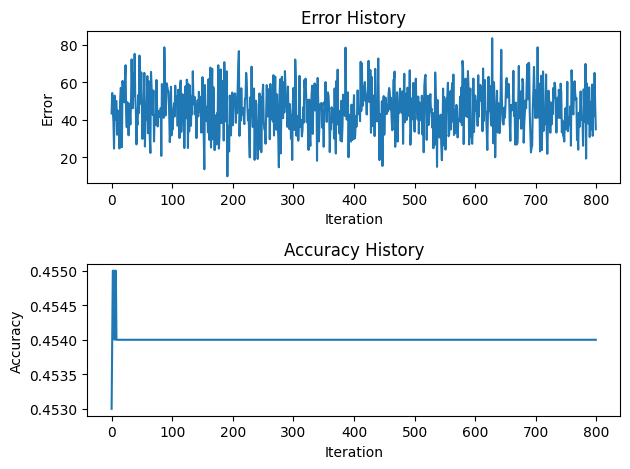

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(error_history)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error History')

plt.subplot(2, 1, 2)
plt.plot(acc_history)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy History')

plt.tight_layout()
plt.show()


4. Plot the data and the trained model. Use the *plot_model* function you implemented before.


**Solution**

Using the *plot_model* function created earlier:

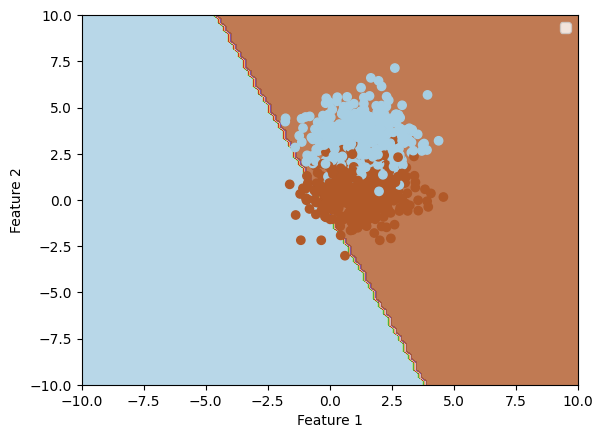

In [ ]:
plot_model(best_model,y,labels)

5. Retrain the model with a variable learning rate. Use the Scheduler you implemented in Question 1. Plot the dataset and the trained model as before. What do you notice now? Is the difference between training with a fixed and a variable learning rate the same as before? Justify your answer.


**Solution**

Like in Question 1 and using the same Scheduler class, the modified *train_batch* function is:

In [ ]:
def train_batch(a, y, labels, n_iterations, lr, variable_lr, batch_size, theta):
    acc_history = []
    error_history = []
    best_accuracy = -1
    best_model = float("-inf")
    
    labels = np.where(labels == 0, -1, labels)
    n_samples = len(labels)
    
    if variable_lr:
      scheduler = Scheduler(lr, n_samples)
    
    for iteration in tqdm(range(n_iterations),desc="Batch perceptron training"):
        error = np.zeros_like(a)
        
        # Randomly select a batch of samples
        indices = np.random.choice(n_samples, size=batch_size, replace=False)
        batch_y = y[indices]
        batch_labels = labels[indices]
        
        for k in range(batch_size):
            x = batch_y[k].astype(a.dtype)
            label = batch_labels[k]
            
            if np.sign(np.dot(a, x)) != label:
                error += x.astype(a.dtype)
        
        if variable_lr:
          lr = scheduler.get_next_lr()

        a += lr * error
        
        if (iteration % (n_samples / batch_size)) == 0:
            accuracy = np.mean([np.sign(np.dot(a, x)) == label for x, label in zip(y, labels)])
            acc_history.append(accuracy)
            tqdm.write(f"Accuracy: {accuracy:.2f}")
            error_history.append(np.abs(np.sum(error)))
            tqdm.write(f"Absolute Error: {np.sum(np.abs(error)):.2f}")


            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = np.copy(a)
        
        if np.sum(np.abs(error)) <= theta:
            tqdm.write("Terminating due to the theta criterion")
            break

        if best_model is None:
         best_accuracy = 0
         best_model = np.zeros_like(a)
    
    return best_model, acc_history, error_history

We now train the model again:

In [ ]:
n_iterations = 10**5
lr = 1
theta = 0.01
batch_size = 16
variable_lr = True

# Train the model using the batch perceptron algorithm
best_model, acc_history, error_history = train_batch(a, y, labels, n_iterations, lr, variable_lr, batch_size, theta)

print(best_model)

Batch perceptron training:   1%|          | 626/100000 [00:00<00:33, 3002.76it/s]

Accuracy: 0.45
Absolute Error: 57.88
Accuracy: 0.45
Absolute Error: 47.43
Accuracy: 0.45
Absolute Error: 50.56
Accuracy: 0.45
Absolute Error: 35.92
Accuracy: 0.45
Absolute Error: 54.99
Accuracy: 0.45
Absolute Error: 51.94


Batch perceptron training:   1%|          | 972/100000 [00:00<00:30, 3203.49it/s]

Accuracy: 0.45
Absolute Error: 45.27
Accuracy: 0.45
Absolute Error: 42.09
Accuracy: 0.45
Absolute Error: 46.82
Accuracy: 0.45
Absolute Error: 45.65
Accuracy: 0.45
Absolute Error: 42.69


Batch perceptron training:   2%|▏         | 1911/100000 [00:00<00:34, 2808.49it/s]

Accuracy: 0.45
Absolute Error: 42.37
Accuracy: 0.45
Absolute Error: 44.56
Accuracy: 0.45
Absolute Error: 34.11
Accuracy: 0.45
Absolute Error: 48.14
Accuracy: 0.45
Absolute Error: 38.01


Batch perceptron training:   3%|▎         | 2501/100000 [00:00<00:35, 2761.81it/s]

Accuracy: 0.45
Absolute Error: 55.62
Accuracy: 0.45
Absolute Error: 42.60
Accuracy: 0.45
Absolute Error: 38.24
Accuracy: 0.45
Absolute Error: 45.17
Accuracy: 0.45
Absolute Error: 45.70


Batch perceptron training:   3%|▎         | 3148/100000 [00:01<00:34, 2841.40it/s]

Accuracy: 0.45
Absolute Error: 39.95
Accuracy: 0.45
Absolute Error: 40.28
Accuracy: 0.45
Absolute Error: 34.35
Accuracy: 0.45
Absolute Error: 39.56
Accuracy: 0.45
Absolute Error: 36.86


Batch perceptron training:   3%|▎         | 3443/100000 [00:01<00:33, 2871.69it/s]

Accuracy: 0.45
Absolute Error: 52.36
Accuracy: 0.45
Absolute Error: 57.35
Accuracy: 0.45
Absolute Error: 41.04
Accuracy: 0.45
Absolute Error: 26.95


Batch perceptron training:   4%|▍         | 3998/100000 [00:01<00:39, 2443.37it/s]

Accuracy: 0.45
Absolute Error: 16.83
Accuracy: 0.45
Absolute Error: 46.60
Accuracy: 0.45
Absolute Error: 51.18
Accuracy: 0.45
Absolute Error: 39.86


Batch perceptron training:   4%|▍         | 4491/100000 [00:01<00:40, 2359.87it/s]

Accuracy: 0.45
Absolute Error: 54.69
Accuracy: 0.45
Absolute Error: 48.64
Accuracy: 0.45
Absolute Error: 69.99
Accuracy: 0.45
Absolute Error: 60.02


Batch perceptron training:   5%|▌         | 5251/100000 [00:02<00:40, 2333.56it/s]

Accuracy: 0.45
Absolute Error: 51.62
Accuracy: 0.45
Absolute Error: 33.62
Accuracy: 0.45
Absolute Error: 28.90
Accuracy: 0.45
Absolute Error: 42.91
Accuracy: 0.45
Absolute Error: 59.64


Accuracy: 0.45
Absolute Error: 58.94
Accuracy: 0.45
Absolute Error: 41.98
Accuracy: 0.45
Absolute Error: 39.85
Accuracy: 0.45
Absolute Error: 42.98
Accuracy: 0.45


Batch perceptron training:   6%|▋         | 6279/100000 [00:02<00:37, 2489.15it/s]

Absolute Error: 53.32
Accuracy: 0.45
Absolute Error: 49.22
Accuracy: 0.45
Absolute Error: 37.48
Accuracy: 0.45
Absolute Error: 42.27
Accuracy: 0.45
Absolute Error: 55.23


Batch perceptron training:   7%|▋         | 6817/100000 [00:02<00:35, 2594.05it/s]

Accuracy: 0.45
Absolute Error: 33.99
Accuracy: 0.45
Absolute Error: 63.42
Accuracy: 0.45
Absolute Error: 72.00
Accuracy: 0.45
Absolute Error: 37.81


Batch perceptron training:   7%|▋         | 7329/100000 [00:02<00:37, 2442.71it/s]

Accuracy: 0.45
Absolute Error: 61.73
Accuracy: 0.45
Absolute Error: 26.75
Accuracy: 0.45
Absolute Error: 46.21
Accuracy: 0.45
Absolute Error: 50.78


Accuracy: 0.45
Absolute Error: 52.27
Accuracy: 0.45
Absolute Error: 25.76
Accuracy: 0.45
Absolute Error: 48.60
Accuracy: 0.45
Absolute Error: 55.77


Accuracy: 0.45
Absolute Error: 47.44
Accuracy: 0.45
Absolute Error: 53.61
Accuracy: 0.45
Absolute Error: 42.42
Accuracy: 0.45
Absolute Error: 66.84
Accuracy: 0.45


Batch perceptron training:   9%|▉         | 8827/100000 [00:03<00:37, 2433.78it/s]

Absolute Error: 44.52
Accuracy: 0.45
Absolute Error: 35.71
Accuracy: 0.45
Absolute Error: 67.84
Accuracy: 0.45
Absolute Error: 45.04


Batch perceptron training:   9%|▉         | 9306/100000 [00:03<00:39, 2273.45it/s]

Accuracy: 0.45
Absolute Error: 46.13
Accuracy: 0.45
Absolute Error: 34.95
Accuracy: 0.45
Absolute Error: 50.23
Accuracy: 0.45
Absolute Error: 48.96


Batch perceptron training:  10%|▉         | 9763/100000 [00:03<00:40, 2235.98it/s]

Accuracy: 0.45
Absolute Error: 52.17
Accuracy: 0.45
Absolute Error: 72.81
Accuracy: 0.45
Absolute Error: 40.18
Accuracy: 0.45
Absolute Error: 53.20


Batch perceptron training:  11%|█         | 10501/100000 [00:04<00:37, 2355.48it/s]

Accuracy: 0.45
Absolute Error: 52.26
Accuracy: 0.45
Absolute Error: 45.93
Accuracy: 0.45
Absolute Error: 39.31
Accuracy: 0.45
Absolute Error: 34.00
Accuracy: 0.45
Absolute Error: 46.90


Batch perceptron training:  11%|█         | 11126/100000 [00:04<00:34, 2583.59it/s]

Accuracy: 0.45
Absolute Error: 57.82
Accuracy: 0.45
Absolute Error: 40.99
Accuracy: 0.45
Absolute Error: 41.09
Accuracy: 0.45
Absolute Error: 44.58
Accuracy: 0.45
Absolute Error: 33.92


Batch perceptron training:  12%|█▏        | 11747/100000 [00:04<00:30, 2868.84it/s]

Accuracy: 0.45
Absolute Error: 55.28
Accuracy: 0.45
Absolute Error: 48.67
Accuracy: 0.45
Absolute Error: 40.50
Accuracy: 0.45
Absolute Error: 44.29
Accuracy: 0.45
Absolute Error: 37.97


Batch perceptron training:  12%|█▏        | 12376/100000 [00:04<00:30, 2849.16it/s]

Accuracy: 0.45
Absolute Error: 33.64
Accuracy: 0.45
Absolute Error: 36.63
Accuracy: 0.45
Absolute Error: 44.34
Accuracy: 0.45
Absolute Error: 43.06
Accuracy: 0.45
Absolute Error: 59.46


Batch perceptron training:  13%|█▎        | 12958/100000 [00:05<00:30, 2877.90it/s]

Accuracy: 0.45
Absolute Error: 60.93
Accuracy: 0.45
Absolute Error: 67.79
Accuracy: 0.45
Absolute Error: 61.11
Accuracy: 0.45
Absolute Error: 44.23
Accuracy: 0.45
Absolute Error: 41.43


Batch perceptron training:  14%|█▎        | 13531/100000 [00:05<00:31, 2745.38it/s]

Accuracy: 0.45
Absolute Error: 51.22
Accuracy: 0.45
Absolute Error: 37.69
Accuracy: 0.45
Absolute Error: 26.41
Accuracy: 0.45
Absolute Error: 51.39
Accuracy: 0.45
Absolute Error: 45.08


Batch perceptron training:  14%|█▍        | 14162/100000 [00:05<00:30, 2816.76it/s]

Accuracy: 0.45
Absolute Error: 31.42
Accuracy: 0.45
Absolute Error: 49.14
Accuracy: 0.45
Absolute Error: 66.89
Accuracy: 0.45
Absolute Error: 54.79
Accuracy: 0.45
Absolute Error: 35.60


Batch perceptron training:  14%|█▍        | 14366/100000 [00:05<00:33, 2594.04it/s]

Terminating due to the theta criterion
[[1090841.20265464 2596050.80809398  874029.25979115]]


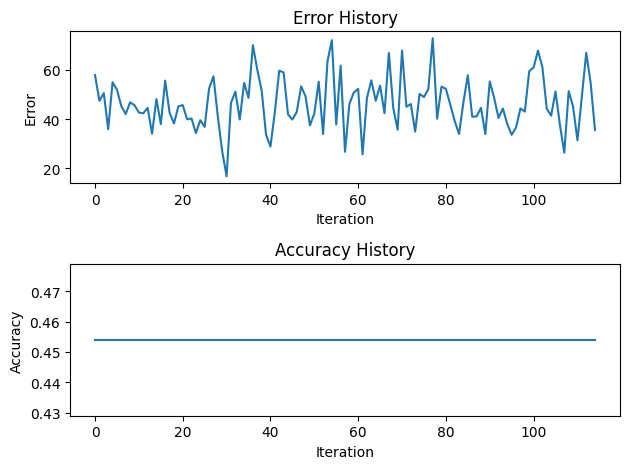

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(error_history)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error History')

plt.subplot(2, 1, 2)
plt.plot(acc_history)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy History')

plt.tight_layout()

plt.show()

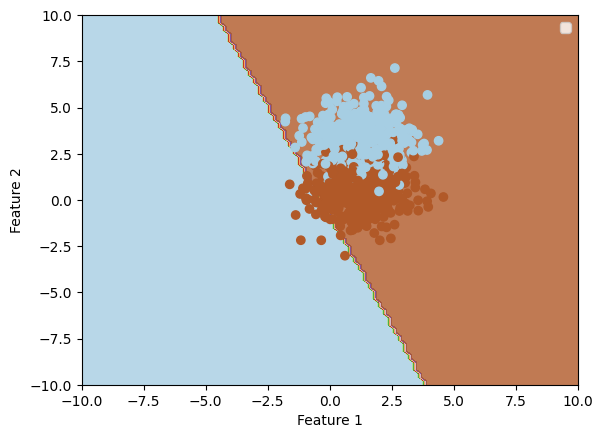

In [ ]:
plot_model(best_model,y,labels)

From our data there is no clear difference between training the batch perceptron with a fixed learning rate or a variable learning rate. This may be due to one or more of the following:

- *Choice of the decaying learning rate*. Different learning rates suit different characteristics of the data.

- *Choice of the initial learning rate*. A learning rate that is too large will cause the learning model to compute drastic updates and diverge rapidly, while a too small learning rate will require many updates before reaching a local extrema.

- *Batch size*. Since the selection of the batch influences the noise introduced during the update of the weights, a small batch size leads to more stochastic updates while a larger batch size (compared to the size of the data) will lead to better generalization and smooth out the loss landscape to reduce the presence of local extrema. This may be beneficial, but if the batch size it too large, it can lead to difficulties in finding sharper and more accurate minima that generalize the model in a more optimal way.

Overall, a number of possible parameter configurations (such as the learning rate, fixed or variable learning rate, batch size, theta, epochs (a single pass through all the samples) etc) must be tested and fine-tuned in order to yield the best possible model, often using random walks on the space of possible configurations, called *hyperparameter tuning* [3]. It should be noted again, as stated in the beginning of the assignment, that the given data is not linearly separable, which should also be taken into consideration.



---



### **References**

1. Duda, R. O., & Hart, P. E. (2006). *Pattern classification*. John Wiley & Sons.

2. Wasserman, L. (2004). *All of Statistics: A concise course in Statistical Inference* (Vol. 26). New York: Springer.

3. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.

 